# Bank Customer Churn Prediction

## Overview

In today's competitive banking environment, customer retention is crucial for long-term success. The Bank Customer Churn Prediction project aims to identify factors that lead to customerchurn and predict which customers are likely to leave the bank. This prediction allows bank to implement targeted retention strategies and improve customer satisfaction.

## Objective

The main objective of this project is to create a model that can predict which bank customers are likely to leave in the near future. By identifying these at-risk customers, the bank can implement strategies to keep them engaged and satisfied, ultimately reducing churn rates and improving customer retention.

## Loading the Data

In [174]:
# importing library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv(r'Bank Churn Prediction.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [176]:
df.shape

(10000, 14)

- There are total 10000 rows and 14 columns

## Overview of Data

**1. RowNumber:** An index that represent each row in the dataset.

**2. CustomerId:** A unique identifier for each customer.

**3. Surname:** The last name of the customer, which can help in identification but is generally not used in predictive modeling due to privacy concerns.

**4. CreditScore:** A numerical representation of customer's creditworthiness, affecting their ability to secure loans and credit products. Higher scores typically indicate better credit health.

**5. Geography:** The geographical location of a customer, which can influence banking habits and preferences.

**6. Gender:** The gender of the customer.

**7. Age:** The age of the customer which can impact their banking needs.

**8. Tenure:** The number of years the customer has been with the bank. Normally, older clients are more loyal and less likely to leave a bank.

**9. Balance:** The account balance of the customer, reflecting their financial health. People with higher bank balance are less likely to leave the bank.

**10. NumOfProducts:** The total number of banking products(e.g, checing accounts, saving accounts, loans) the customer holds.

**11. HasCrCard:** A binary indicator (0 or 1) showing whether the customer has a credit card with the bank. People with a credit card are less likely to leave the bank.

**12. IsActiveMember:** A binary variable indicating whether the customer is active member of bank. Active customer are less likely to leave the bank.

**13. EstimatedSalary:** The estimated annual income of the customer. People with lower salaries are more likely to leave the bank compared to those with higher salaries. 

**14. Exited:** The target variable indicating whether the customer has exited(1) or retained(0) their relationship with bank.

In [177]:
df.columns

# Observation:
    # There are some irrelevant columns such as RowNumber and Surname
    # The target column is Exited

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### <span style='color:red'>Observation</span>

- The data has 10,000 entries.
- The data has no missing values.
- There are 11 numerical and 3 categorical column.

In [179]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Removing irrelevant columns

In [180]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [181]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking Null Values

In [182]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### <span style='color:blue'> Exploratory Data Analysis</span>

### Division of Data

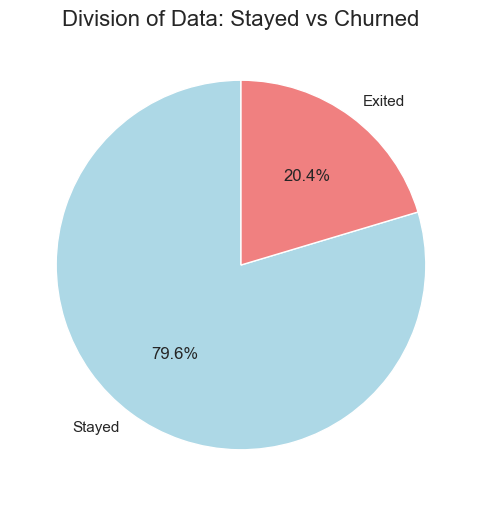

<Figure size 640x480 with 0 Axes>

In [183]:
churn_counts = df['Exited'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['Stayed','Exited'],autopct='%1.1f%%',colors=['lightblue','lightcoral'],startangle=90)
plt.title('Division of Data: Stayed vs Churned',fontsize=16)
plt.show()
plt.savefig('churnpie.png')

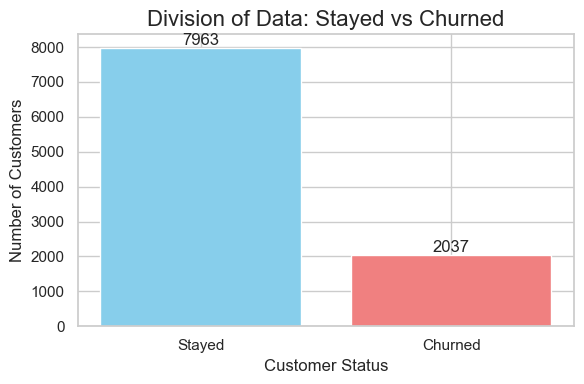

In [184]:
churn_counts = df['Exited'].value_counts()
plt.figure(figsize=(6,4))
bars=plt.bar(['Stayed','Churned'],churn_counts,color=['skyblue','lightcoral'])
plt.title('Division of Data: Stayed vs Churned',fontsize=16)
plt.xlabel('Customer Status',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)

for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+10, int(yval),ha='center',va='bottom',fontsize=12)
plt.tight_layout()
plt.savefig('churnbar.jpg')

### Gender Distribution

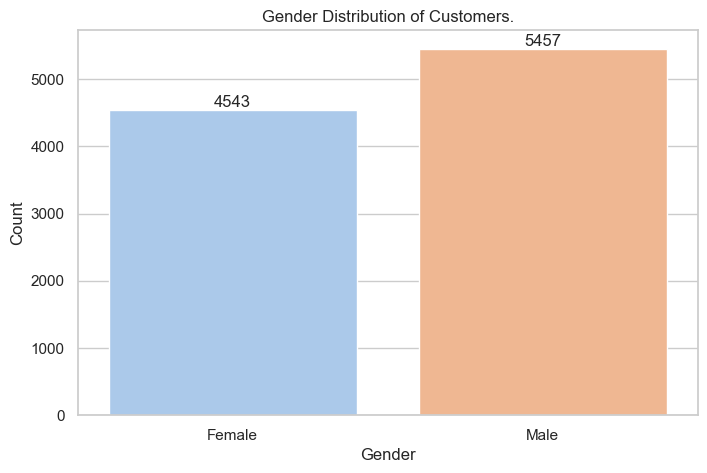

In [185]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Gender', palette='pastel')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution of Customers.')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### <span style='color:red'>Observation</span>

- There are total 5457 male and 4543 female customers in bank
- Male customers are more than female in the bank.

### Geography Distribution

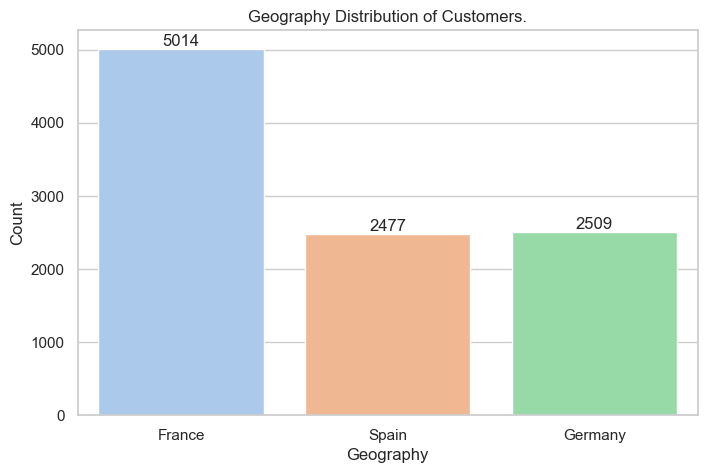

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Geography', palette='pastel')
ax.bar_label(ax.containers[0])
plt.title('Geography Distribution of Customers.')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### <span style='color:red'>Observation</span>

- Most customers are from France i.e 5014 customers.
- Also 2477 customers from Spain and 2509 from Germany,

### Exited Distribution

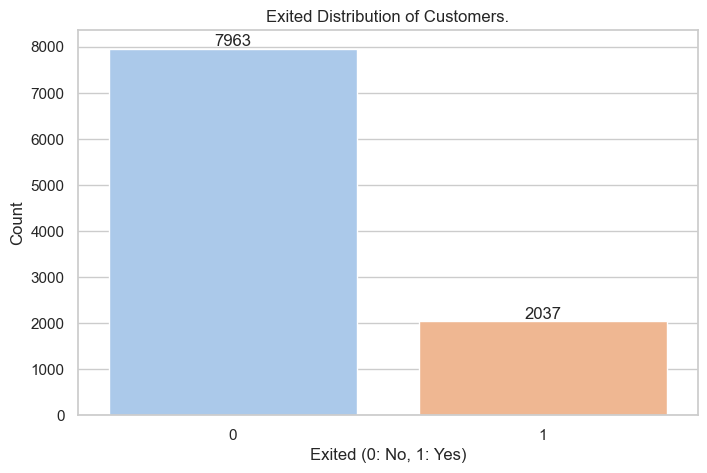

In [187]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Exited', palette='pastel')
ax.bar_label(ax.containers[0])
plt.title('Exited Distribution of Customers.')
plt.xlabel('Exited (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1])
labels=['Not Exited (0)','Exited (1)']
plt.show()

### <span style='color:red'>Observation</span>

- 7963 customers did not leave the bank while 2037 customers leave the bank.

### Distribution of Age

C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


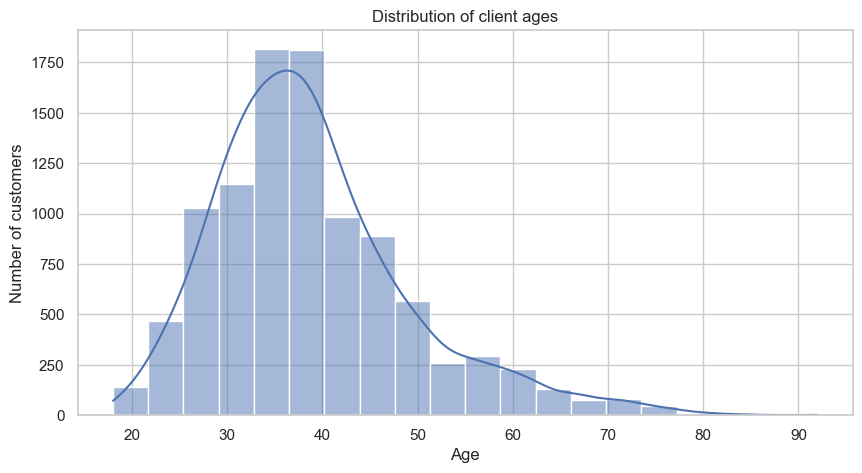

In [188]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x ='Age',bins=20,ax=ax,kde=True)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Distribution of client ages')
plt.show()

### <span style='color:red'>Observation</span>

-  Majority of the customers are between the ages of 25 to 50

### Customer Balance Distribution

C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


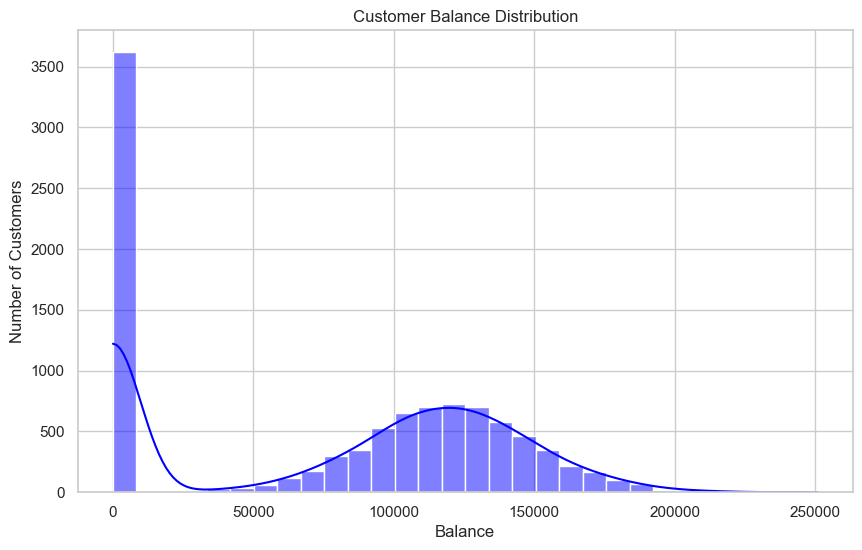

In [189]:
plt.figure(figsize=(10,6))
sns.histplot(df['Balance'],bins=30,kde=True,color='blue')
plt.title('Customer Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.show()

In [190]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

### <span style='color:red'>Observation</span>

- Most customers have a balance of 0.
- The KDE line increases from 50000 and decreases to 200000.

### Description of Data

In [191]:
avg_age = df.groupby('Exited')['Age'].mean()
gender_dist = df.groupby(['Exited','Gender']).size().unstack(fill_value=0)
avg_balance = df.groupby('Exited')['Balance'].mean()
avg_credit_score = df.groupby('Exited')['CreditScore'].mean()
avg_tenure = df.groupby('Exited')['Tenure'].mean()

summary_df = pd.DataFrame({'Average Age':avg_age,
                          'Average Balance':avg_balance,
                          'Average Credit Score':avg_credit_score,
                          'Average Tenure':avg_tenure})
summary_df

,Average Age,Average Balance,Average Credit Score,Average Tenure
Exited,,,,
0,37.408389,72745.296779,651.853196,5.033279
1,44.837997,91108.539337,645.351497,4.932744


### Distribution of Credit Score

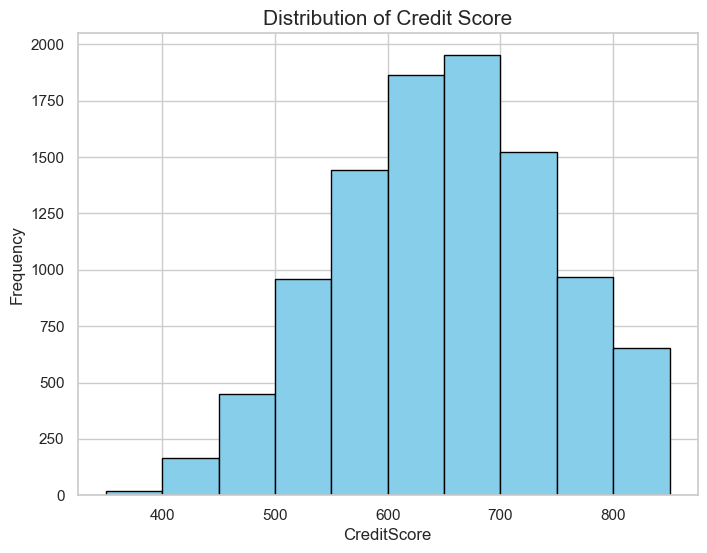

In [192]:
plt.figure(figsize=(8,6))
plt.hist(df['CreditScore'],bins=10,color='skyblue',edgecolor='black')
plt.title('Distribution of Credit Score',fontsize=15)
plt.xlabel('CreditScore',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.grid(True)
plt.show()

### <span style='color:red'>Observation</span>

- By analyzing we can see that most customers have a credit score between 500 and 800 with a peak at 650.
- Means less credit score customers can leave the bank.

### Distribution of Tenure

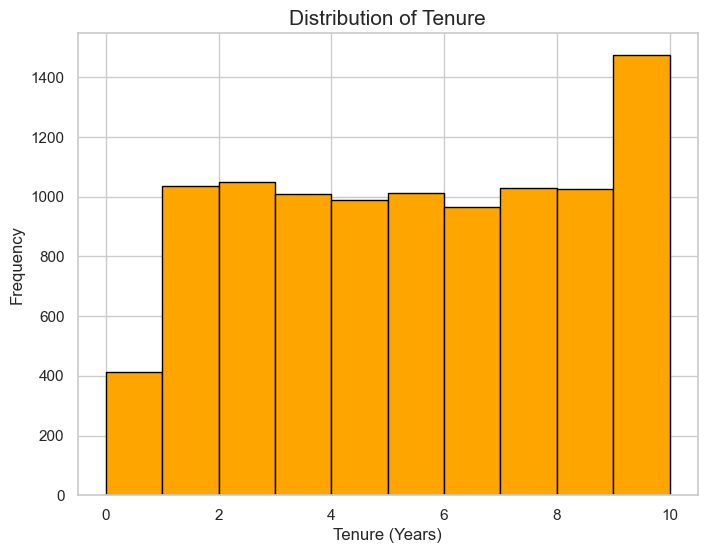

In [193]:
plt.figure(figsize=(8,6))
plt.hist(df['Tenure'],bins=10,color='orange',edgecolor='black')
plt.title('Distribution of Tenure',fontsize=15)
plt.xlabel('Tenure (Years)',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.grid(True)
plt.show()

### <span style='color:red'>Observation</span>

- Most of the customers have a tenure of 9 to 10 years nearly 1400 customers.

### Geography wise Churn Rate

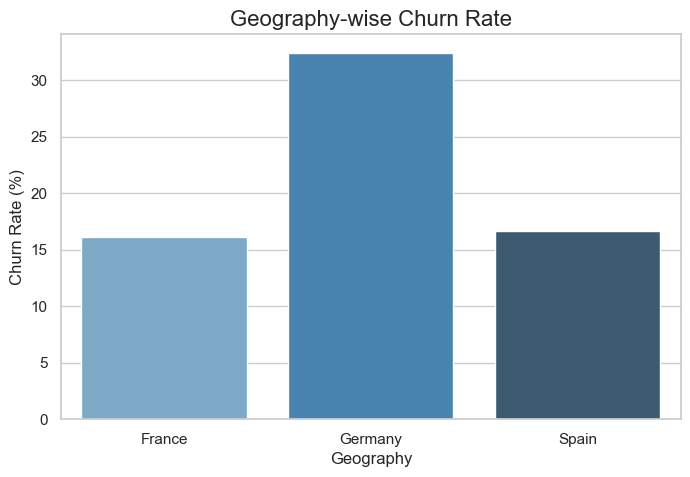

<Figure size 640x480 with 0 Axes>

In [194]:
geography_churn = df.groupby('Geography')['Exited'].mean()*100
plt.figure(figsize=(8,5))
sns.barplot(x=geography_churn.index, y=geography_churn.values, palette='Blues_d')
plt.title('Geography-wise Churn Rate',fontsize=16)
plt.xlabel('Geography',fontsize=12)
plt.ylabel('Churn Rate (%)',fontsize=12)
plt.show()
plt.savefig('Geo.png')

### Geography wise Churn 

<Figure size 1000x600 with 0 Axes>

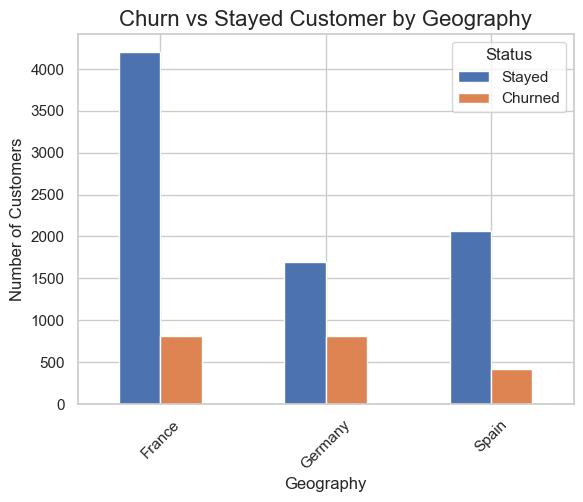

In [56]:
churn_summary = df.groupby(['Geography','Exited']).size().unstack()
churn_summary.columns = ['Stayed','Churned']
plt.figure(figsize=(10,6))
churn_summary.plot(kind='bar')
plt.title('Churn vs Stayed Customer by Geography',fontsize=16)
plt.xlabel('Geography',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

### <span style='color:red'>Observation</span>

- We can see that France customers has good stay rate, while germany has low rate.
- France and Germany has same churn rate.

### Correlation Matrix

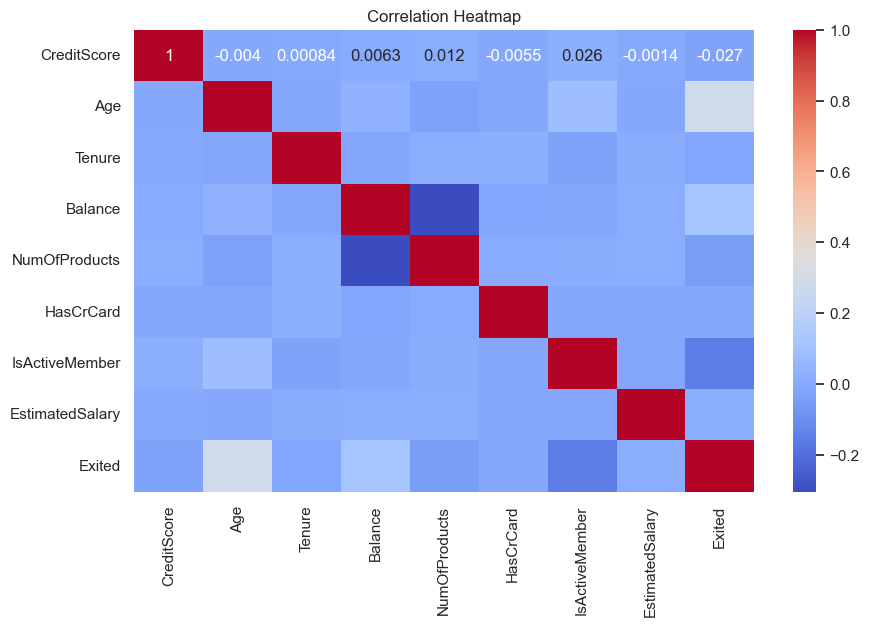

In [57]:
corr_df = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Preprocessing Steps

In [195]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [196]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Checking Skewness

In [59]:
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

#### Checking Outliers

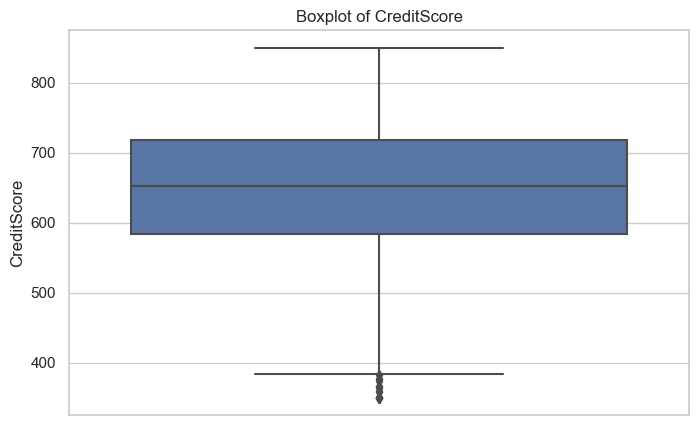

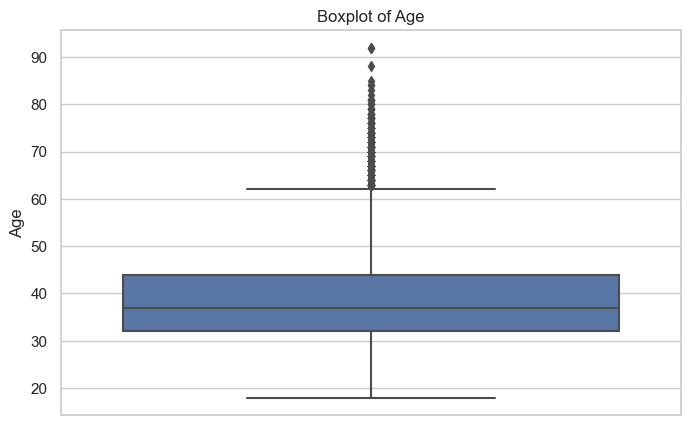

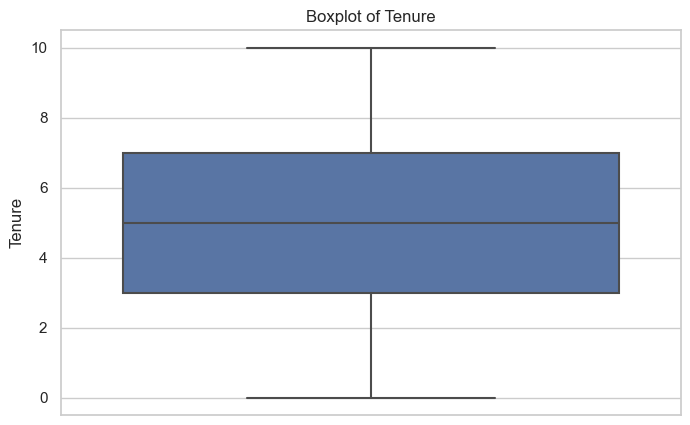

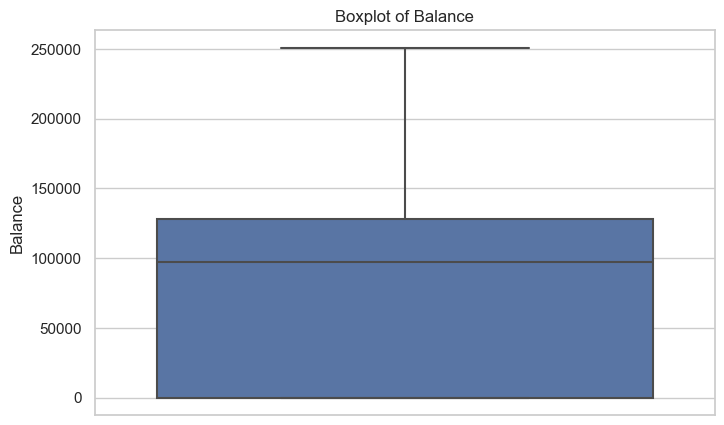

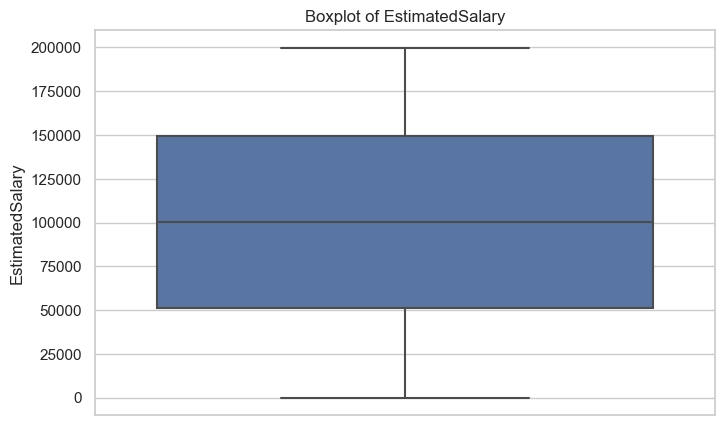

In [60]:
num_col = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for i in num_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df,y=i)
    plt.title(f"Boxplot of {i}")
    plt.ylabel(i)

### <span style='color:red'>Observation</span>

- There are outliers present in 'Age' and 'CreditScore'

### Treating Outlier

#### For 'Age' column

In [61]:
Q1 = df['Age'].quantile(0.25)
Q1

32.0

In [62]:
Q3 = df['Age'].quantile(0.75)
Q3

44.0

In [63]:
IQR = Q3 - Q1
IQR

12.0

In [64]:
# upper limit
UL = Q3+1.5*IQR
UL

62.0

In [65]:
# lower limit
LL = Q1-1.5*IQR
LL

14.0

In [66]:
df = df[(df['Age']<UL) & (df['Age']>LL)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [67]:
df['Exited'].value_counts()

Exited
0    7646
1    1943
Name: count, dtype: int64

#### For 'CreditScore' Column

In [68]:
Q1 = df['CreditScore'].quantile(0.25)
Q1

583.0

In [69]:
Q3 = df['CreditScore'].quantile(0.75)
Q3

717.0

In [70]:
IQR = Q3 - Q1
IQR

134.0

In [71]:
# upper limit
UL = Q3+1.5*IQR
UL

918.0

In [72]:
# lower limit
LL = Q1-1.5*IQR
LL

382.0

In [73]:
df = df[(df['CreditScore']<UL) & (df['CreditScore']>LL)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


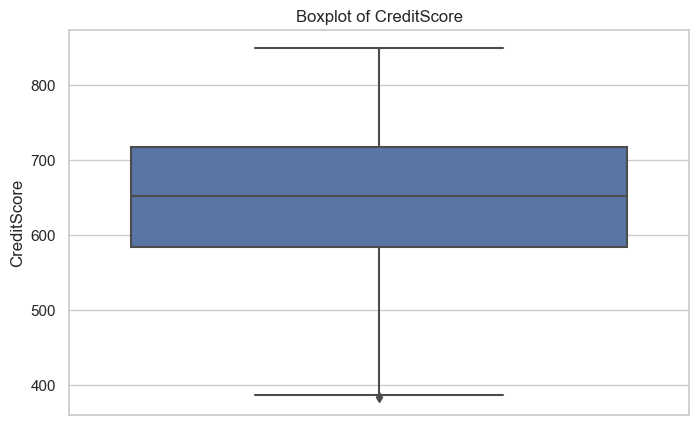

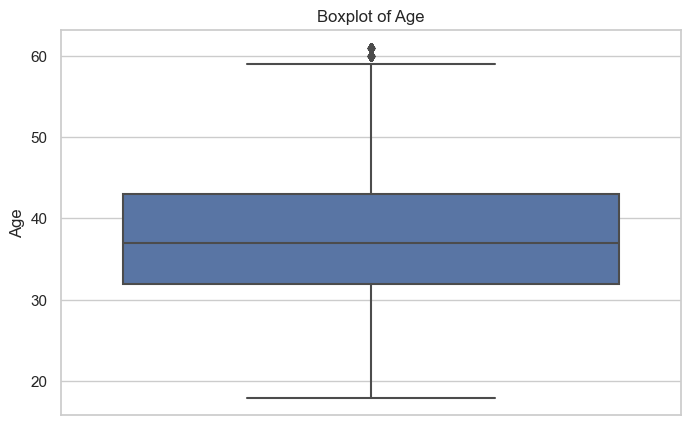

In [74]:
num_col = ['CreditScore','Age']
for i in num_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df,y=i)
    plt.title(f"Boxplot of {i}")
    plt.ylabel(i)

### Converting the Categorical column to Numerical`

In [75]:
df.select_dtypes(include=['object','category']).columns

Index(['Geography', 'Gender'], dtype='object')

In [76]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [77]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Geography'] = LE.fit_transform(df['Geography'])
df['Gender'] = LE.fit_transform(df['Gender'])

C:\Users\jadem\AppData\Local\Temp\ipykernel_18448\2513852378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geography'] = LE.fit_transform(df['Geography'])
C:\Users\jadem\AppData\Local\Temp\ipykernel_18448\2513852378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = LE.fit_transform(df['Gender'])


In [79]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Training and Testing

In [80]:
# Train test split

x = df.drop('Exited',axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [81]:
y = df['Exited']
y.value_counts()

Exited
0    7646
1    1928
Name: count, dtype: int64

In [82]:
# importing library

from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## <span style='color:blue'>Logistic Regression</span>

In [84]:
# importing library
from sklearn.linear_model import LogisticRegression

In [85]:
LR = LogisticRegression()
LR

LogisticRegression()

In [86]:
LR.fit(x_train,y_train)

LogisticRegression()

### <span style='color:purple'>Model Prediction</span>

In [87]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
y_test

6575    1
1562    1
5381    0
5573    0
9353    0
       ..
4764    0
1669    0
6986    0
362     0
5441    0
Name: Exited, Length: 1915, dtype: int64

In [89]:
error = y_test - y_pred
error

6575    1
1562    1
5381    0
5573    0
9353    0
       ..
4764    0
1669    0
6986    0
362     0
5441    0
Name: Exited, Length: 1915, dtype: int64

#### Training Score

In [90]:
LR.score(x_train,y_train)

0.7985376681028855

#### Testing Score

In [91]:
LR.score(x_test,y_pred)

1.0

### Accuracy of Model

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy of model using Logistic Regression is {acc}")

Accuracy of model using Logistic Regression is 0.8151436031331593


In [94]:
print('Confusion Matrix')
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[1509,   35],
       [ 319,   52]], dtype=int64)

In [95]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1828
           1       0.14      0.60      0.23        87

    accuracy                           0.82      1915
   macro avg       0.56      0.71      0.56      1915
weighted avg       0.94      0.82      0.86      1915



## <span style='color:blue'>KNN Classifier</span>

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN

KNeighborsClassifier(n_neighbors=6)

In [98]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

### <span style='color:purple'>Model Prediction</span>

In [99]:
y_pred = KNN.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
y_test

6575    1
1562    1
5381    0
5573    0
9353    0
       ..
4764    0
1669    0
6986    0
362     0
5441    0
Name: Exited, Length: 1915, dtype: int64

#### Training Score

In [101]:
KNN.score(x_train,y_train)

0.8079383731557644

#### Testing Score

In [102]:
KNN.score(x_test,y_pred)

1.0

### Accuracy of Model

In [103]:
acc = accuracy_score(y_pred,y_test)
print(f"Accuracy of model using KNN Classifier is {acc}")

Accuracy of model using KNN Classifier is 0.7921671018276762


In [104]:
print('Confusion Matrix')
confusion_matrix(y_test,y_pred)

Confusion Matrix


array([[1505,   39],
       [ 359,   12]], dtype=int64)

In [105]:
print('Classification Report')
print(classification_report(y_pred,y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1864
           1       0.03      0.24      0.06        51

    accuracy                           0.79      1915
   macro avg       0.50      0.52      0.47      1915
weighted avg       0.95      0.79      0.86      1915



## <span style='color:blue'>Decision Tree Classifier</span>

In [153]:
# importing library

from sklearn.tree import DecisionTreeClassifier

In [154]:
DC = DecisionTreeClassifier()
DC

DecisionTreeClassifier()

In [155]:
DC.fit(x_train,y_train)

DecisionTreeClassifier()

### <span style='color:purple'>Model Prediction</span>

In [156]:
y_pred = DC.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
y_test

6575    1
1562    1
5381    0
5573    0
9353    0
       ..
4764    0
1669    0
6986    0
362     0
5441    0
Name: Exited, Length: 1915, dtype: int64

#### Training Score

In [158]:
DC.score(x_train,y_train)

1.0

#### Testing Score

In [159]:
DC.score(x_test,y_pred)

1.0

### Accuracy of Model

In [160]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7879895561357703
Confusion Matrix:
[[1316  228]
 [ 178  193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1544
           1       0.46      0.52      0.49       371

    accuracy                           0.79      1915
   macro avg       0.67      0.69      0.68      1915
weighted avg       0.80      0.79      0.79      1915



In [114]:
# Plotting tree
from sklearn import tree

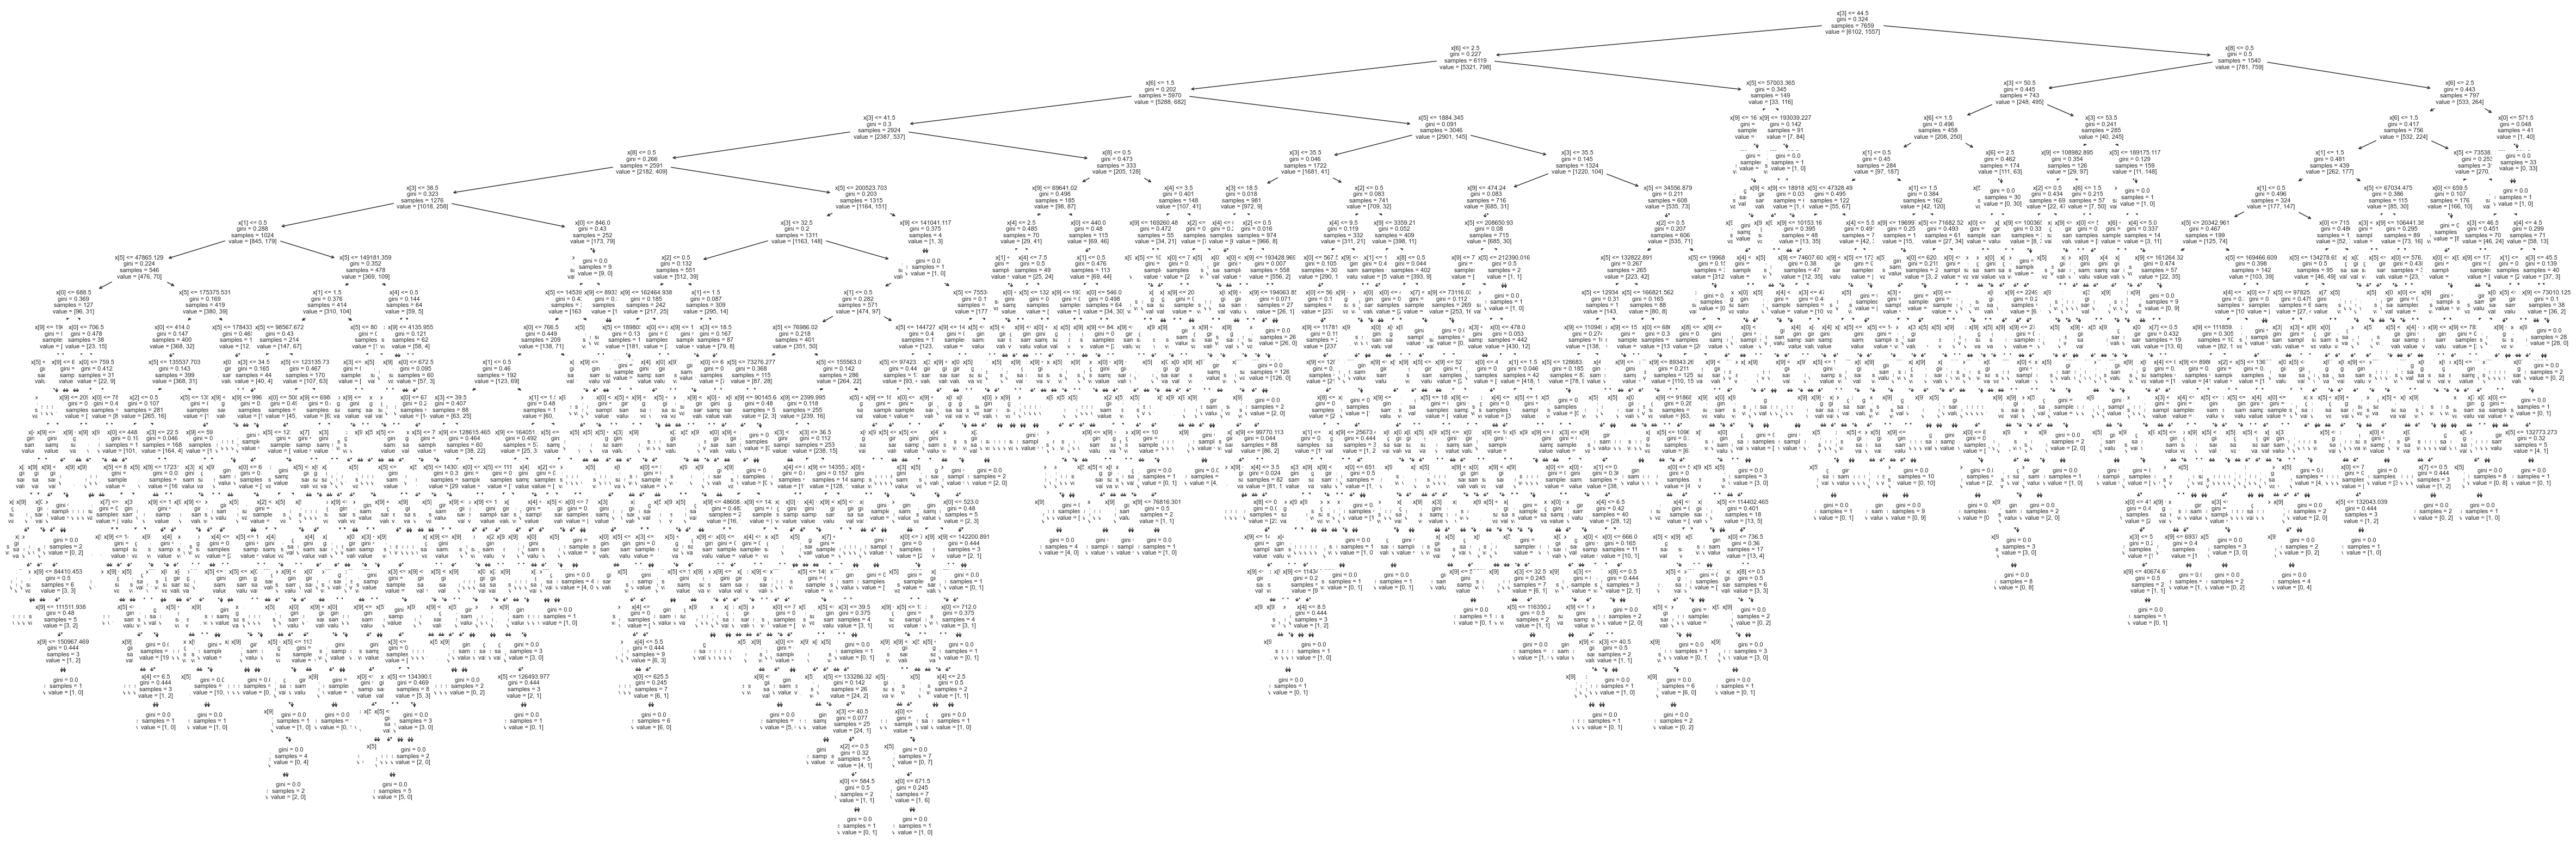

In [115]:
plt.figure(figsize=(60,20))
tree.plot_tree(DC,fontsize = 8)
plt.show()

## <span style='color:blue'>Random Forest Classifier</span>

In [161]:
# importing library 

from sklearn.ensemble import RandomForestClassifier

In [162]:
RC = RandomForestClassifier(n_estimators = 100,random_state=42)
RC

RandomForestClassifier(random_state=42)

In [163]:
RC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

### <span style='color:purple'>Model Prediction</span>

In [164]:
y_pred = RC.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [165]:
y_test

6575    1
1562    1
5381    0
5573    0
9353    0
       ..
4764    0
1669    0
6986    0
362     0
5441    0
Name: Exited, Length: 1915, dtype: int64

#### Training Score

In [166]:
RC.score(x_train,y_train)

1.0

#### Testing Score

In [167]:
RC.score(x_test,y_pred)

1.0

### Accuracy of Model

In [168]:
accuracy = accuracy_score(y_test,y_pred) * 100
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}%")
print("Classification Report:")
print(class_report)

Accuracy: 85.79634464751959%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1544
           1       0.72      0.43      0.54       371

    accuracy                           0.86      1915
   macro avg       0.80      0.70      0.73      1915
weighted avg       0.85      0.86      0.84      1915



#### Classification Report for Random Forest


Classification Report Table for Random Forest:
              precision    recall  f1-score      support
0              0.875443  0.960492  0.915998  1544.000000
1              0.723982  0.431267  0.540541   371.000000
accuracy       0.857963  0.857963  0.857963     0.857963
macro avg      0.799712  0.695880  0.728269  1915.000000
weighted avg   0.846100  0.857963  0.843259  1915.000000


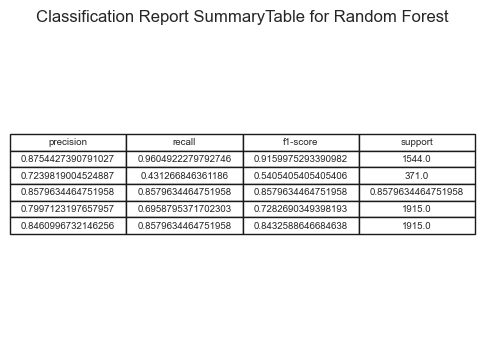

In [171]:
report = classification_report(y_test,y_pred,output_dict=True)
report_df = pd.DataFrame(report).transpose()
summary_table= report_df[['precision','recall','f1-score','support']]
print("\nClassification Report Table for Random Forest:")
print(summary_table)

fig,ax=plt.subplots(figsize=(6,4))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=summary_table.values,colLabels=summary_table.columns,cellLoc='center',loc='center')
plt.title('Classification Report SummaryTable for Random Forest')
plt.show()

## <span style='color:red'>Observation</span>

Logistic: 0.8151436031331593    Train: 0.7985376681028855     Test: 1.0 
KNN: 0.7921671018276762   Train: 0.8079383731557644     Test: 1.0
Decision: 0.79    Train: 1.0     Test: 1.0
Random: 0.86    Train: 1.0   Test:  1.0

- After performing all Classification Algorithms.
- **Decision Tree** and **Random Forest** show perfect training and testing score of **1.0**,
- Random Forest gives the best accuracy score of **0.86**.
- After Random Forest, Logistic Regression also have good accuracy score of **0.81**.
- So we can say that **Random Forest** is best for this dataset.

:

In [169]:
dict = {'lr':0.8151436031331593,
       'KNN':0.7921671018276762,
       'DC':0.7879895561357703,
       'RFC':85.79634464751959}
dict

{'lr': 0.8151436031331593,
 'KNN': 0.7921671018276762,
 'DC': 0.7879895561357703,
 'RFC': 85.79634464751959}